In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

combined_data_path = '/Users/yilu/Downloads/pythonProject/Combined.csv'
combined_data = pd.read_csv(combined_data_path)

imputer = SimpleImputer(strategy='mean')
combined_data_imputed = imputer.fit_transform(combined_data)

combined_data = pd.DataFrame(combined_data_imputed, columns=combined_data.columns)

X = combined_data.drop(columns=['label'])
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy}")

Accuracy of Logistic Regression model: 0.9999903842455479


In [4]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC of Logistic Regression model: {auc}")

print("Classification report:")
print(classification_report(y_test, y_pred))

AUC of Logistic Regression model: 0.9995047753129939
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103447
         1.0       1.00      1.00      1.00       549

    accuracy                           1.00    103996
   macro avg       1.00      1.00      1.00    103996
weighted avg       1.00      1.00      1.00    103996



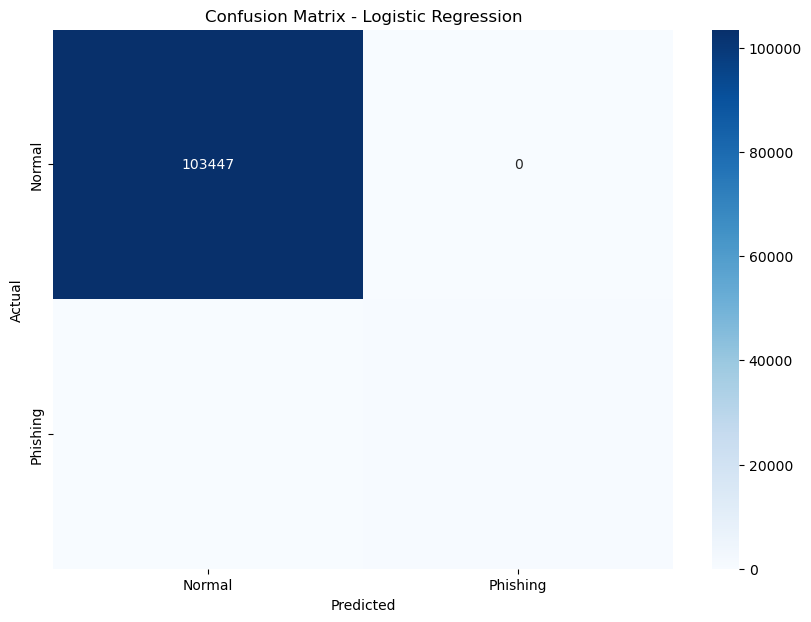

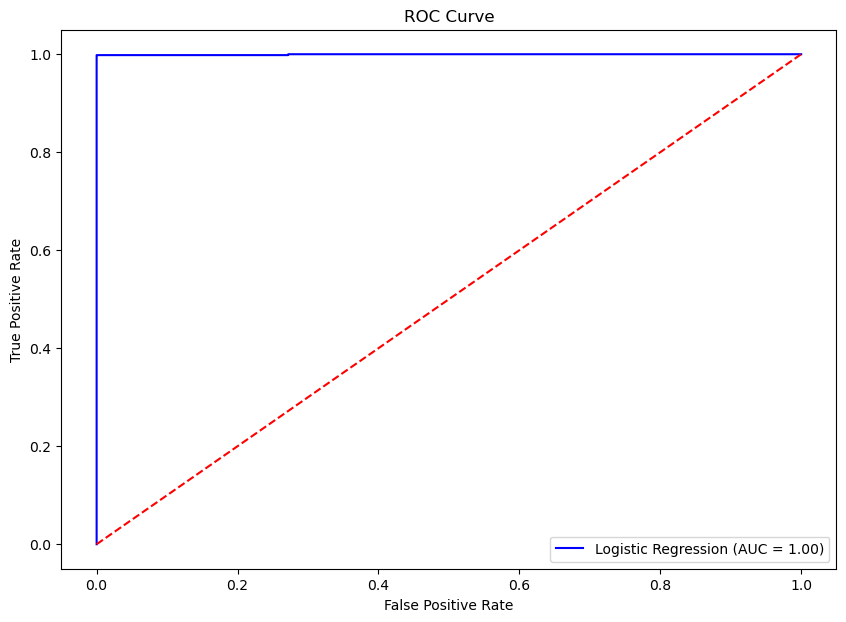

The Logistic Regression model is saved to a file: /Users/yilu/Downloads/pythonProject/Logistic_Regression_model.pkl


In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

model_path = '/Users/yilu/Downloads/pythonProject/Logistic_Regression_model.pkl'
joblib.dump(model, model_path)
print(f"The Logistic Regression model is saved to a file: {model_path}")